# ch 12_4. word cloud

이전 챕터에서 2022년 한국 야구 데이터 셋을 토큰화 했습니다. 이번 챕터에서는 가장 기본적인 자연어 데이터 시각화 기법인 워드 클라우드에 대해서 알아보겠습니다. 워드 클라우드는 특정 단어와 함께 등장한 단어의 빈도 수를 집계해서, 어떤 단어가 연관되어 있는지를 시각적으로 표현하는 기법입니다.

In [1]:
!pip install wordcloud

## 선수 이름 데이터 준비
우리가 만들어보고 싶은 건 특정 선수 이름이 주어지면, 그 선수와 함께 언급되는 단어들을 시각적으로 보여주는 것입니다. 이를 위해서 먼저 토큰화 한 뉴스 기사 데이터에서 특정 선수가 언급되면, 함께 언급된 단어들의 빈도수를 세어 딕셔너리 형태로 만들어보겠습니다. 

먼저 기사에 선수 이름이 포함되었는지 여부를 판단하기 위해 크롤러 시간에 짰던 코드를 재사용합니다.

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv("./data/baseball_players.csv", index_col=["구단"])

In [44]:
positions = ["투수", "포수", "내야수", "외야수"]
for position in positions:
    df[position] = df[position].apply(lambda x: x.split("\n"))

In [45]:
df

,투수,포수,내야수,외야수
구단,,,,
롯데,"[김진욱, 한현희, 최준용, 박세웅, 구승민, 김상수, 반즈, 신정락, 최이준, 김...","[유강남, 정보근]","[안치홍, 한동희, 김민수, 노진혁, 박승욱, 이학주, 전준우, 정훈]","[안권수, 렉스, 김민석, 고승민, 윤동희]"
SSG,"[고효준, 서진용, 김광현, 맥카티, 노경은, 박민호, 문승원, 오원석, 임준섭, ...","[김민식, 조형우]","[최정, 박성한, 김건웅, 최주환, 전의산, 최경모, 김성현]","[추신수, 에레디아, 한유섬, 오태곤, 김정민, 최상민]"
LG,"[임찬규, 함덕주, 정우영, 진해수, 켈리, 이정용, 배재준, 박명근, 김진성, 플...","[김기연, 박동원]","[오지환, 서건창, 김민성, 문보경, 송찬의, 정주현]","[박해민, 김현수, 오스틴, 신민재, 홍창기, 문성주]"
두산,"[박치국, 홍건희, 이병헌, 김동주, 최지강, 알칸타라, 김명신, 곽빈, 최원준, ...","[장승현, 양의지]","[허경민, 강승호, 전민재, 김재호, 양석환, 이유찬]","[로하스, 정수빈, 김재환, 강진성, 조수행, 양찬열, 송승환]"
NC,"[송명기, 페디, 김태현, 김영규, 김시훈, 임정호, 하준영, 이용준, 신민혁, 김...","[박세혁, 안중열]","[도태훈, 박민우, 오영수, 서호철, 오태양, 윤형준, 김한별, 김주원]","[천재환, 김성욱, 손아섭, 박건우, 한석현]"
KIA,"[윤영철, 임기영, 이준영, 최지민, 메디나, 이의리, 장현식, 전상현, 김기훈, ...","[주효상, 한승택]","[박찬호, 김규성, 김선빈, 변우혁, 황대인, 홍종표, 류지혁]","[이우성, 김호령, 소크라테스, 최형우, 고종욱, 이창진]"
삼성,"[김대우, 원태인, 우규민, 이승현, 오승환, 김태훈, 백정현, 뷰캐넌, 문용익, ...","[이병헌, 김태군, 강민호]","[김재상, 이성규, 김영웅, 조민성, 오재일, 김지찬, 이재현, 공민규]","[윤정빈, 김성윤, 구자욱, 피렐라]"
키움,"[최원태, 김재웅, 김성진, 양현, 안우진, 요키시, 임창민, 하영민, 정찬헌, 김...","[김동헌, 이지영]","[전병우, 이원석, 김태진, 러셀, 김혜성, 김휘집]","[김준완, 이용규, 임병욱, 이형종, 박찬혁, 이정후, 이병규]"
KT,"[고영표, 김민, 엄상백, 슐서, 손동현, 벤자민, 박세진, 김영현, 조이현, 박영...","[장성우, 김준태]","[문상준, 황재균, 오윤석, 강민성, 강백호, 박경수, 김상수]","[이시원, 조용호, 문상철, 알포드, 홍현빈, 김민혁]"


In [46]:
player_names_list = df.values.flatten()
players = []
for player_names in player_names_list:
    players.extend(player_names)
players = set(players)

In [47]:
print(players)

{'김선빈', '최승용', '김서현', '장민재', '박민우', '오윤석', '김민성', '김대유', '반즈', '김진호', '박해민', '이재현', '문상준', '홍현빈', '고봉재', '페디', '에레디아', '오스틴', '오영수', '류지혁', '이지강', '곽빈', '김동혁', '임준섭', '정찬헌', '임병욱', '알포드', '김현수', '이원석', '메디나', '백승건', '허경민', '김태훈', '박경수', '고승민', '김성현', '김성진', '서건창', '조용호', '한승택', '송승환', '신민혁', '서호철', '김한별', '최상민', '김재웅', '노수광', '나균안', '홍창기', '문상철', '이정후', '이의리', '김민석', '최원태', '김재윤', '요키시', '구승민', '송명기', '이성규', '정우영', '페냐', '박승욱', '소크라테스', '러셀', '로하스', '홍건희', '윤형준', '장진혁', '박성한', '피렐라', '공민규', '맥카티', '이준호', '김명신', '장승현', '강진성', '김호령', '이용규', '박상언', '이진영', '강백호', '한석현', '김기중', '김영규', '양석환', '김정민', '정수빈', '박치국', '임정호', '김주원', '손아섭', '오재일', '임창민', '오원석', '김재상', '김영웅', '유로결', '김민수', '양의지', '고효준', '김지찬', '정훈', '함덕주', '조수행', '전준우', '문승원', '김휘집', '이형종', '윤대경', '김태현', '조민석', '김민식', '정해영', '켈리', '뷰캐넌', '박민호', '최형우', '박종훈', '양현', '윤영철', '안중열', '채은성', '이지영', '최정', '엄상백', '조형우', '신민재', '김준태', '김건웅', '황대인', '최지강', '이병규', '도태훈', '김상수', '황재균', '노시환', '오태양', '원태인', '김태군', '전상현', '강승호', '최민준', '김재환', '이유찬

## 기사 토큰화 환 데이터 셋 준비

토큰화한 데이터 셋을 순회하며 특정 기사에 선수 이름이 포함되어 있을 경우, 함께 언급된 일반 명사, 고유 명사의 빈도수를 세어서 딕셔너리에 추가합니다.

In [48]:
import pandas as pd
from tqdm import tqdm

In [49]:
df = pd.read_csv("./data/baseball_tokenized_10K.csv")

In [50]:
df = df[["content_tokens"]]

In [51]:
df

,content_tokens
0,"[('""', 'SS'), ('구속', 'NNP'), (',', 'SP'), ('구위..."
1,"[('(', 'SS'), ('서울', 'NNP'), ('=', 'SW'), ('뉴스..."
2,"[('두산', 'NNP'), ('베어스', 'NNP'), ('가', 'JKS'), ..."
3,"[('-', 'SS'), (""'"", 'SS'), ('2021', 'SN'), ('K..."
4,"[('""', 'SS'), ('포지션', 'NNP'), ('변경', 'NNG'), (..."
...,...
9995,"[('KIA', 'NNP'), ('가', 'JKS'), ('25', 'SN'), (..."
9996,"[('3', 'SN'), ('회', 'NNB'), ('말', 'NNB'), ('빅'..."
9997,"[('롯데', 'NNP'), ('자이언츠', 'NNP'), ('이대호', 'NNP'..."
9998,"[('“', 'SS'), ('(', 'SS'), ('안', 'NNP'), (')',..."


### 결측치 확인 및 제거

In [52]:
df.isnull().sum()

content_tokens    1
dtype: int64

In [53]:
df = df.dropna()

### 명사 추출
제목과 본문을 토큰화한 문자열에서 일반 명사와 고유 명사만 추출하여 데이터 프레임의 컬럼으로 추가합니다.

In [54]:
def extract_nouns(tokens_str):
    tokens = eval(tokens_str)
    nouns = [text for text, tag in tokens if tag in ("NNP", "NNG")]
    return nouns

In [55]:
tqdm.pandas()
df["content_nouns"] = df["content_tokens"].progress_apply(extract_nouns)

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:17<00:00, 572.93it/s]
C:\Users\WOODLAC\AppData\Local\Temp\ipykernel_17612\40737521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content_nouns"] = df["content_tokens"].progress_apply(extract_nouns)


In [56]:
df.iloc[0]['content_tokens']

'[(\'"\', \'SS\'), (\'구속\', \'NNP\'), (\',\', \'SP\'), (\'구위\', \'NNG\'), (\',\', \'SP\'), (\'컨트롤\', \'NNP\'), (\',\', \'SP\'), (\'이닝\', \'NNP\'), (\'소화\', \'NNP\'), (\'능력\', \'NNG\'), (\'등\', \'NNB\'), (\'모든\', \'MM\'), (\'면\', \'NNG\'), (\'에서\', \'JKB\'), (\'현재\', \'MAG\'), (\'능력\', \'NNG\'), (\'보다\', \'JKB\'), (\'한\', \'MM\'), (\'단계\', \'NNG\'), (\'향상\', \'NNG\'), (\'하\', \'XSV\'), (\'는\', \'ETM\'), (\'게\', \'NNG\'), (\'목표\', \'NNG\'), (\'다\', \'NNG\'), (\'"\', \'SS\'), (\'.\', \'SF\'), (\'\\xa0\', \'SW\'), ("\'", \'SS\'), (\'푸른\', \'NNP\'), (\'피\', \'NNG\'), (\'의\', \'JKG\'), (\'에이스\', \'NNP\'), ("\'", \'SS\'), (\'원태인\', \'NNP\'), (\'(\', \'SS\'), (\'22\', \'SN\'), (\'·\', \'SP\'), (\'삼성\', \'NNP\'), (\')\', \'SS\'), (\'이\', \'MM\'), (\'성적\', \'NNG\'), (\'향상\', \'NNG\'), (\'을\', \'JKO\'), (\'위하\', \'VV\'), (\'아\', \'EC\'), (\'통\', \'MAG\'), (\'크\', \'VA\'), (\'ㄴ\', \'ETM\'), (\'투자\', \'NNG\'), (\'에\', \'JKB\'), (\'나서\', \'VV\'), (\'ㄴ다\', \'EF\'), (\'.\', \'SF\'), (\'원태인\', \'NNP\')

### 동시 출현 빈도 집계
특정 선수의 이름과 함께 등장한 명사를 defaultdict와 Counter를 이용해서 집계합니다.

In [57]:
from collections import Counter, defaultdict
from tqdm import tqdm

word_count_dict = defaultdict(Counter)

def count_words(nouns):
    player_name_nouns = set(nouns).intersection(players)
    for player_name in player_name_nouns:
        c = Counter([x for x in nouns if x != player_name])
        word_count_dict[player_name] += c

In [58]:
content_nouns_series = df["content_nouns"]

for content_nouns in tqdm(content_nouns_series):
    count_words(content_nouns)

100%|████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:04<00:00, 2096.64it/s]


In [59]:
word_count_dict["김광현"].most_common(10)

[('SSG', 3644),
 ('경기', 2707),
 ('시즌', 2345),
 ('승', 1628),
 ('투수', 1555),
 ('팀', 1538),
 ('선수', 1455),
 ('리그', 1424),
 ('키움', 1381),
 ('이닝', 1371)]

word_count_dict## word cloud 시각화

함께 등장하는 단어를 세었으니 이제 워드 클라우드를 만들어보겠습니다. 폰트 적용 부분은 아래 가이드를 읽어보고, 본인의 환경에 맞게 코드를 수정하면 됩니다.

- [윈도우 폰트 적용 가이드](https://doitgrow.com/34#:~:text=%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%EC%97%90%20%EC%82%AC%EC%9A%A9%ED%95%A0%20%ED%8F%B0%ED%8A%B8,%EA%B2%B0%EA%B3%BC%EB%A5%BC%20%ED%99%95%EC%9D%B8%ED%95%A0%20%EC%88%98%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4.)
- [맥 폰트 적용 가이드](https://business-analytics.tistory.com/3)

In [64]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

def visualize_wordcloud(word_count, color):
    wordcloud = WordCloud(
        font_path='malgun',
        width=1000, 
        height=400, 
        scale=2.0, 
        background_color='white', 
        colormap=color,
        max_font_size=150
    ).generate_from_frequencies(word_count)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)

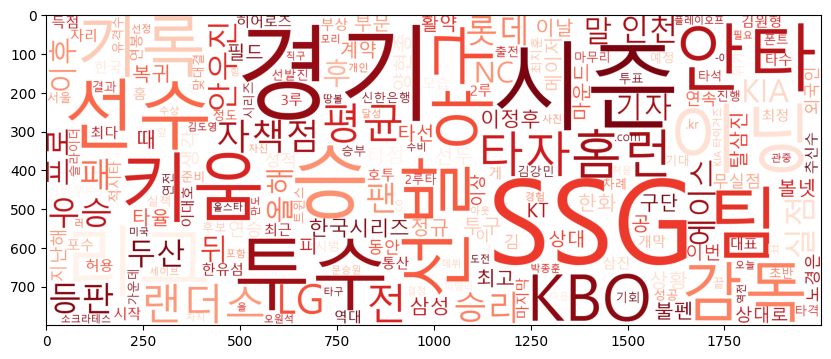

In [65]:
visualize_wordcloud(word_count_dict["김광현"], "Reds")

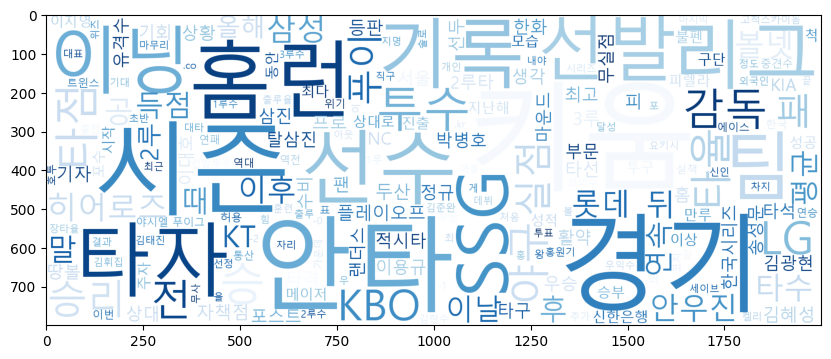

In [66]:
visualize_wordcloud(word_count_dict["이정후"], "Blues")

## 정리
이번 챕터에서는 자연어 데이터 시각화 하면 가장 먼저 떠오르는 워드 클라우드를 만들어 보았습니다. 사실 워드 클라우드는 직관적으로 의미를 전달하는 것이 어려워서 잘 사용되지 않습니다. 이어지는 챕터들에서 더 정교화 된 자연어처리 알고리즘들을 배워보겠습니다.